+------------+-------------------+-----------+-----------+--------------------+---------------------+------------------+
|    Size    |   Average Delay   | Max Delay | Min Delay |     Delay STD      |      Delay Var      | Packet Loss Rate |
+------------+-------------------+-----------+-----------+--------------------+---------------------+------------------+
| 100 Bytes  | 6.270752000000001 |   8.975   |   5.396   | 0.5401998190447679 | 0.29181584449599995 |       0.0        |
| 500 Bytes  | 6.410372000000001 |   15.889  |   5.133   | 0.6119764616519168 |    0.374515189616   |       0.0        |
| 1000 Bytes | 6.508361999999999 |   8.185   |   5.202   | 0.5594971286396383 |    0.313037036956   |       0.0        |
| 2000 Bytes | 6.795811811811811 |   16.286  |   5.561   | 0.6445670230999166 | 0.41546664726788846 |      0.001       |
| 3000 Bytes |      7.013683     |   9.916   |   5.667   | 0.5725807248860199 | 0.32784868651099996 |       0.0        |
| 4000 Bytes | 8.708068595927115

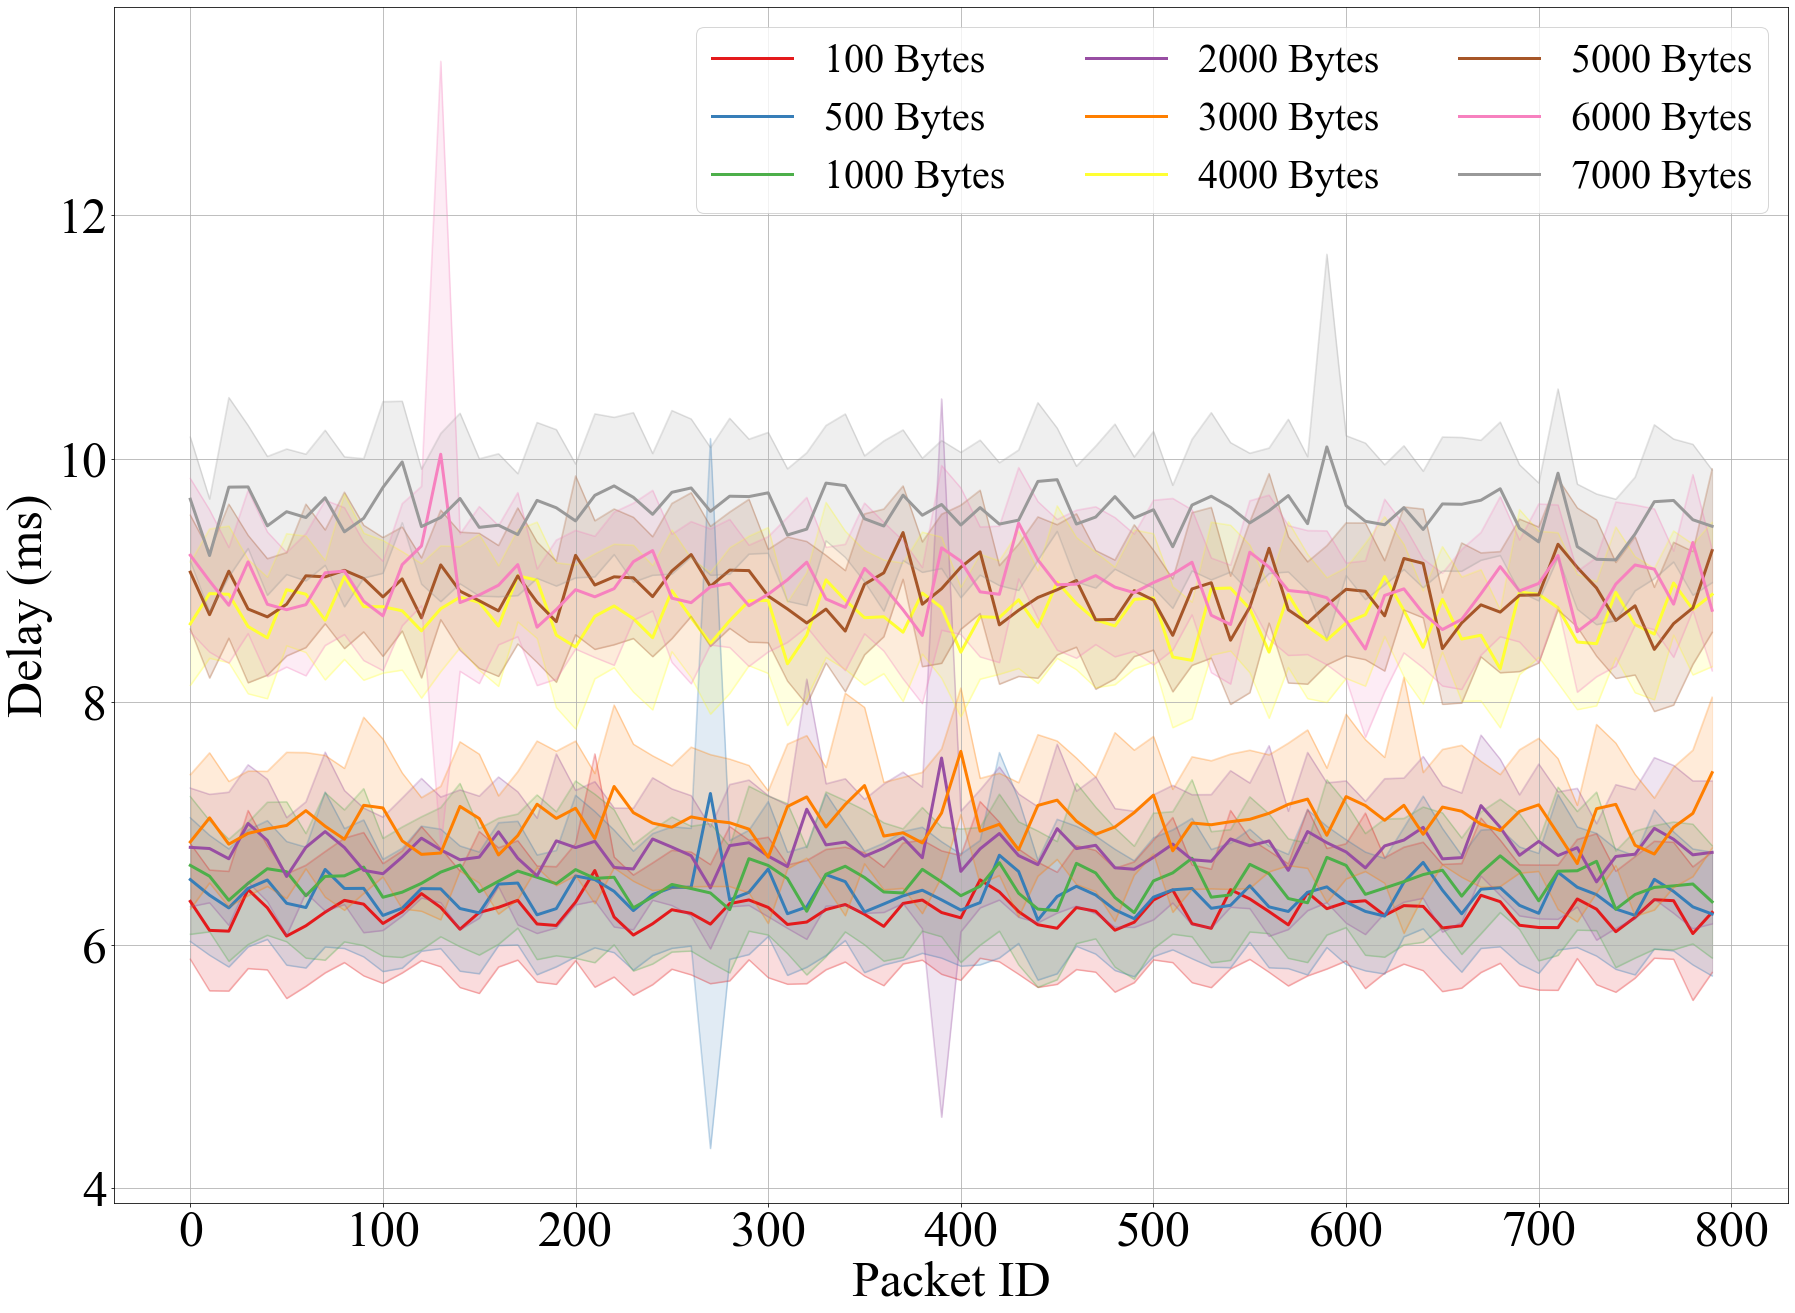

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import brewer2mpl

bmap = brewer2mpl.get_map('Set1','Qualitative', 9)
colors = bmap.mpl_colors

file_name_100 = "one-shot/100 Bytes/TestRX_2023-03-27_22-52-06.3F22D3F4"
file_name_500 = "one-shot/500 Bytes/TestRX_2023-03-27_23-14-32.B644468F"
file_name_1000 = "one-shot/1000 Bytes/TestRX_2023-03-27_23-12-15.78F9F82A"
file_name_2000 = "one-shot/2000 Bytes/TestRX_2023-03-27_23-22-29.F72D49E9"
file_name_3000 = "one-shot/3000 Bytes/TestRX_2023-03-27_23-02-34.99E6AD3C"
file_name_4000 = "one-shot/4000 Bytes/TestRX_2023-03-27_23-20-18.3FFCD18C"
file_name_5000 = "one-shot/5000 Bytes/TestRX_2023-03-27_23-00-02.339234F1"
file_name_6000 = "one-shot/6000 Bytes/TestRX_2023-03-27_23-18-02.79C14F26"
file_name_7000 = "one-shot/7000 Bytes/TestRX_2023-03-27_22-56-15.F85EE399"

file_name = []
file_name.append(file_name_100)
file_name.append(file_name_500)
file_name.append(file_name_1000)
file_name.append(file_name_2000)
file_name.append(file_name_3000)
file_name.append(file_name_4000)
file_name.append(file_name_5000)
file_name.append(file_name_6000)
file_name.append(file_name_7000)

delays = []
packet_sum = 1000

for file in file_name:
    f = open(file)               # 返回一个文件对象 
    line = f.readline()               # 调用文件的 readline()方法
    delay = list()
    while line: 
        line_split = line.split(',')
        try:
            end_time = line_split[7]
            start_time = line_split[20]
        except IndexError:
            line = f.readline()
            continue
        try:    
            timesteamp = (int(end_time) - int(start_time)) / 1000  # ms
            delay.append(timesteamp)
        except ValueError:
            pass
        line = f.readline()
    delays.append(delay)
    f.close() 
    
table = PrettyTable(['Size', 'Average Delay','Max Delay','Min Delay', 'Delay STD', 'Delay Var', 'Packet Loss Rate'])
byte_list = ['100 Bytes', '500 Bytes', '1000 Bytes', '2000 Bytes', '3000 Bytes', '4000 Bytes', '5000 Bytes', '6000 Bytes', '7000 Bytes']

for i in range(len(delays)):
    np_array = np.array(delays[i])
    table.add_row([
        byte_list[i], 
        np_array.mean(), 
        np_array.max(),
        np_array.min(),
        np_array.std(),          # 标准差
        np_array.var(),          # 方差
        ((packet_sum - np_array.size) / packet_sum)
    ])

print(table)


def get_mean_and_standard_deviation_result(result, ranges, max_num):
    """From a list of lists of agent results it extracts the mean results and the mean results plus or minus
        some multiple of the standard deviation"""
    mean_results = []
    mean_minus_std = []
    mean_plus_std = []
    index = 0
    for i in range(int(max_num / ranges) - 1):
        result_at_a_range = result[index: index + ranges]
        index += ranges
        mean_result = np.mean(result_at_a_range)
        std_result = np.std(result_at_a_range)
        mean_results.append(mean_result)
        mean_minus_std.append(mean_result - std_result)
        mean_plus_std.append(mean_result + std_result)
    
    result_at_a_range = result[-ranges:]
    mean_result = np.mean(result_at_a_range)
    std_result = np.std(result_at_a_range)
    mean_results.append(mean_result)
    mean_minus_std.append(mean_result - std_result)
    mean_plus_std.append(mean_result + std_result)
    return mean_minus_std, mean_results, mean_plus_std


def draw_one_result(axe, epoch_index, rewards, ranges, max_num, color, line_label, linewidth=3.0):
    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    axe.plot(nex_x_vals, mean_results, color=color, linestyle="-", label=line_label, linewidth=linewidth)
    axe.plot(nex_x_vals, mean_plus_std, color=color, alpha=0.25)
    axe.plot(nex_x_vals, mean_minus_std, color=color, alpha=0.25)
    axe.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.15, color=color)

df = pd.DataFrame (delays).transpose()
df.columns = ['100 Bytes', '500 Bytes', '1000 Bytes', '2000 Bytes', '3000 Bytes', '4000 Bytes', '5000 Bytes', '6000 Bytes', '7000 Bytes']
df.to_csv("delays.csv")

labels = ['100 Bytes', '500 Bytes', '1000 Bytes', '2000 Bytes', '3000 Bytes', '4000 Bytes', '5000 Bytes', '6000 Bytes', '7000 Bytes']
markers = ['*', 'd', 's', '^', 'o', 'P', 'X', 'D', 'v']
font_size = 50
legend_size = 40
markersize = 10
plt.figure(figsize=(30, 22))  
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体

epoch_index = []
for i in range(1000):
    epoch_index.append(i)
    
ranges = 10
max_num = 800
# i = 0
# draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
# i = 2
# draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
# i = 4
# draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
# i = 6
# draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i:i+2], line_label=labels[i])
for i in range(len(delays)):
    draw_one_result(plt, epoch_index, np.array(delays[i]), ranges, max_num, colors[i], line_label=labels[i])
    # plt.plot(range(len(delays[i])), delays[i], 'o', marker=markers[i], markersize=markersize, color=colors[i], alpha=0.5, label=labels[i])

plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
# plt.ylim(5, 15)
# plt.xlim(0,1000)
plt.grid()
plt.legend(loc=0, fontsize = legend_size, ncol=3)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
plt.xlabel("Packet ID", fontsize=font_size)  # 横坐标名字
plt.ylabel("Delay (ms)", fontsize=font_size)  # 纵坐标名字
plt.savefig("Fig-delays.pdf", bbox_inches='tight')
plt.show()